In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
image=cv2.imread('me.png',1)
original_img=image.copy()


In [20]:
# import cv2

# camera = cv2.VideoCapture(0)
# for i in range(1):
#     _, image = camera.read()
#     cv2.imwrite('/'+'image.jpg', image)
    
# del(camera)

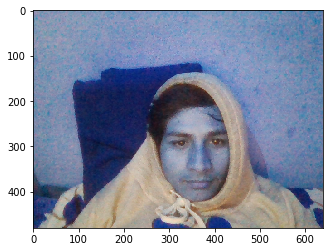

In [21]:
plt.imshow(image)

In [22]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [23]:
net=cv2.dnn.readNet('yolov3.cfg')

In [24]:
classes=[]
with open('coco.names','r') as f:
    classes=[line.strip() for line in f.readlines()]


In [25]:
layer_name=net.getLayerNames()

In [26]:
output_layer=[layer_name[i[0] -1] for i in net.getUnconnectedOutLayers()]

In [27]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [28]:
height,width=gray_image.shape

In [29]:
blob=cv2.dnn.blobFromImage(image,0.003,(512,512),(0,0,0),True)

In [30]:
net.setInput(blob)
outs=net.forward(output_layer)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\dnn\src\layers\convolution_layer.cpp:278: error: (-215:Assertion failed) blobs.size() != 0 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'


In [31]:
class_ids=[]
boxes=[]
confidences=[]

for out in outs:
    for det in out:
        score=det[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        
        if confidence > 0.4:
            cx=int(det[0]*width)
            cy=int(det[1]*height)
            
            w=int(det[2]*width)
            h=int(det[3]*height)
            
            
            x,y=int(cx-w/2),int(cy-h/2)
            boxes.append([x,y,w,h])
            confidences.append(confidence)
            class_ids.append(class_id)
            
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,105,0),10)
            
plt.imshow(image)
            
        

NameError: name 'outs' is not defined

In [32]:
class_ids,boxes,confidence

NameError: name 'confidence' is not defined

In [33]:
n_det=len(boxes)

conf = [.6, .5, .2]
indexs=cv2.dnn.NMSBoxes(boxes,conf,0.4,0.4)
for i in range(n_det):
    if i in indexs:
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[1]])
        cv2.rectangle(image,(x,y),(x+h,y+w),(255,0,0),5)
        cv2.putText(image,label,(x,y+30),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),3)
    

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\dnn\src\nms.cpp:27: error: (-215:Assertion failed) bboxes.size() == scores.size() in function 'cv::dnn::dnn4_v20190621::NMSBoxes'


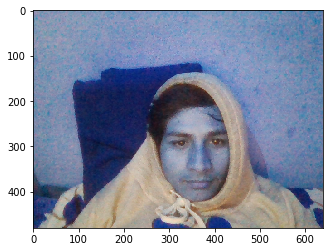

In [34]:
plt.imshow(image)

In [35]:
confidence

NameError: name 'confidence' is not defined

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



# cap = cv2.VideoCapture('video.mp4')

#create the DNN with existing weights and configurations
net = cv2.dnn.readNet('yolov3-tiny.weights', 'yolov3-tiny.cfg')

classes = []

#coco dataset contains 80 classes
with open('coco.names', 'r') as f:
    classes = [ line.strip() for line in f.readlines()]
    

#get the layer names
layer_names = net.getLayerNames()

#get o/p layer
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

#color for each class labels
colors = np.random.uniform(0, 255, size = (len(classes), 3))
cap = cv2.VideoCapture(0)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
  
while(cap.isOpened()):
    
  ret, frame = cap.read()
  if ret == True:
          
        img = frame
        height, width, n_channels = img.shape
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop = False) 
        net.setInput(blob)
        outs = net.forward(output_layers)        
        class_ids = []
        boxes = []
        confidences = []
        for out in outs:
            for det in out:
                scores = det[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                
                if confidence > 0.5:
                    cx = int(det[0] * width)
                    cy = int(det[1] * height)
                    
                    w = int(det[2] * width)
                    h = int(det[3] * height)
                    
                    x = int(cx - w / 2)
                    y = int(cy - h / 2)
                    
                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        n_det = len(boxes)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        font = cv2.FONT_HERSHEY_PLAIN
        
        for i in range(n_det):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                color = colors[i]
                cv2.rectangle(img, (x, y), (x + h, y + w), color, 2)
                cv2.putText(img, label, (x, y + 30), font, 1, color, 3)
        
        cv2.imshow('_', img)
        if cv2.waitKey(25) & 0xFF == ord('q'):
             break
  else: 
    break
     

cap.release()

cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:214: error: (-212:Parsing error) Failed to parse NetParameter file: yolov3-tiny.weights in function 'cv::dnn::dnn4_v20190621::readNetFromDarknet'
